## Load and read DMS Zeppelin data
### Diffrent years have different resolution

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### Read DMS excel sheet 
#### Contains three columns: Datetime   DayOfYear   Conc in pptv

In [2]:
pd.read_excel?

### Function to read excel sheet 

In [3]:
path = r'C:\Users\Lovisa\Documents\GitHub\Tjaernoe2022-group3\DMS_ZEP_2014-2019_Final_LN.xlsx'

def read_xl(path, year):
    dms = pd.read_excel(path,sheet_name=year)
    dms.columns = ['datetime', 'doy','dms']
    print(dms.tail(10))
    return dms

### Read and merge data into dataframe

In [4]:
DFs = []
years = [2010, 2014, 2015, 2016, 2017,2019]
for year in years:
    df_dms = read_xl(path, str(year))
    DFs.append(df_dms)
df_dms_10_19 = pd.concat(DFs)

                   datetime         doy        dms
939 2010-06-13 01:35:59.995  163.066667   6.374763
940 2010-06-13 03:05:59.995  163.129167   9.726222
941 2010-06-13 04:35:59.995  163.191667  20.976191
942 2010-06-13 06:05:59.995  163.254167  23.578646
943 2010-06-13 07:35:59.995  163.316667  26.376799
944 2010-06-13 09:05:59.995  163.379167  20.514896
945 2010-06-13 10:35:59.995  163.441667  25.289145
946 2010-06-13 12:05:59.990  163.504167  16.269145
947 2010-06-13 13:35:59.990  163.566667  13.890619
948 2010-06-13 15:05:59.990  163.629167  10.141228
               datetime         doy        dms
895 2014-09-21 19:45:00  263.822917  11.758727
896 2014-09-21 21:20:00  263.888889  10.600372
897 2014-09-21 22:55:00  263.954861   5.798790
898 2014-09-22 00:30:00  264.020833   6.990726
899 2014-09-22 02:05:00  264.086806   6.851878
900 2014-09-22 03:40:00  264.152778   9.038679
901 2014-09-22 05:15:00  264.218750   7.090849
902 2014-09-22 06:50:00  264.284722   6.764845
903 2014-09-22 0

In [5]:
df_dms_10_19.tail()

,datetime,doy,dms
6807,2019-10-22 01:34:00,294.065278,0.0
6808,2019-10-22 02:04:00,294.086111,0.0
6809,2019-10-22 02:34:00,294.106944,0.0
6810,2019-10-22 03:04:00,294.127778,0.0
6811,2019-10-22 03:34:00,294.148611,0.0


## Plot time series

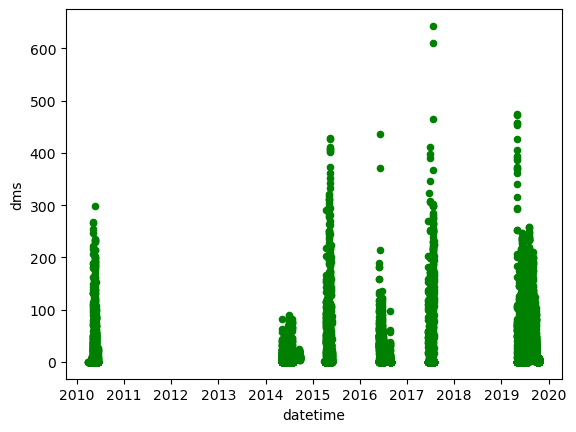

In [6]:
fig = df_dms_10_19.plot(x = 'datetime', y = 'dms', kind = 'scatter',color = 'g')

## Slice data to look at yearly time series

In [7]:
df_dms_10_19['year'] = df_dms_10_19['datetime'].dt.year

In [8]:
df_dms_10_19 = df_dms_10_19.set_index('datetime') # Use the datetime as index and not number of datapoints

### Resample to daily mean

In [39]:
df_daily = df_dms_10_19.resample('D').mean()

In [40]:
df_daily

,doy,dms,year
datetime,,,
2010-04-01,90.517361,0.000000,2010.0
2010-04-02,91.517361,0.000000,2010.0
2010-04-03,92.517361,0.000000,2010.0
2010-04-04,93.517361,0.000000,2010.0
2010-04-05,94.517361,0.000000,2010.0
...,...,...,...
2019-10-18,290.483711,1.170213,2019.0
2019-10-19,291.485185,0.085868,2019.0
2019-10-20,292.483741,0.000000,2019.0


### Make subplots of DMS daily mean for each year to check data availablity

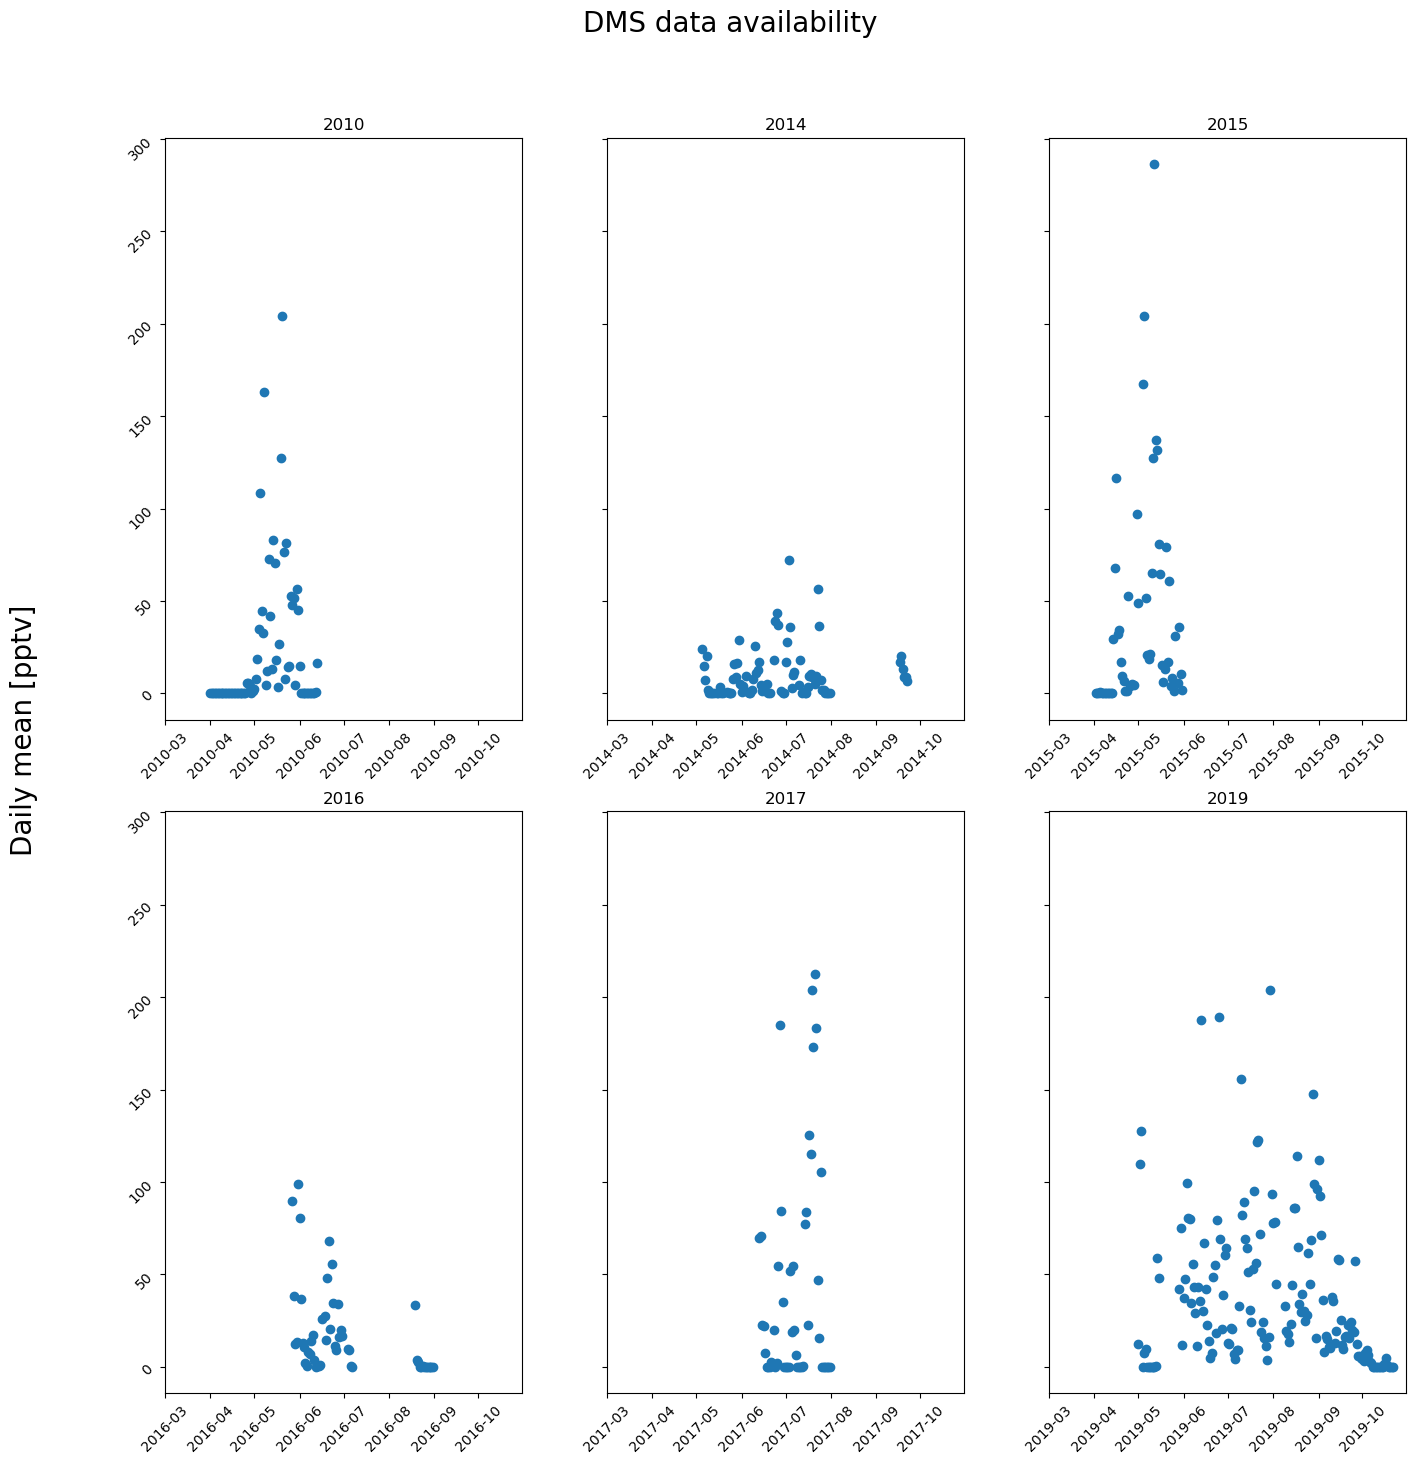

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3,sharey=True,figsize=(15, 15)) # sharey sets the common y-axis

# Set common titles and fig properties
fig.suptitle('DMS data availability',fontsize = 20) 
fig.supylabel('Daily mean [pptv]',fontsize = 20)
fig.tight_layout(pad=4.5)

axs = axes.flatten()

for year, ax in zip(years, axs):
    ds_year = df_daily[df_daily['year'] == year]
    ax.plot(ds_year.index, ds_year.dms, 'o')
    ax.tick_params(labelrotation=45)
    ax.title.set_text(str(year))
    ax.set_xlim([datetime.date(year, 3, 1), datetime.date(year, 10, 31)]) # Set the common x-axis
    
# If you want to save the figure: 
#plt.savefig('test.png', bbox_inches='tight') 



In [10]:
df_dms_10_19

,doy,dms,year
datetime,,,
2010-04-01 01:54:59.995,90.079861,0.0,2010.0
2010-04-01 04:54:59.995,90.204861,0.0,2010.0
2010-04-01 07:54:59.995,90.329861,0.0,2010.0
2010-04-01 10:54:59.995,90.454861,0.0,2010.0
2010-04-01 13:54:59.995,90.579861,0.0,2010.0
...,...,...,...
2019-10-22 01:34:00.000,294.065278,0.0,2019.0
2019-10-22 02:04:00.000,294.086111,0.0,2019.0
2019-10-22 02:34:00.000,294.106944,0.0,2019.0


In [11]:
df_monthly = df_dms_10_19.resample('M').mean()


In [12]:
df_monthly

,doy,dms,year
datetime,,,
2010-04-30,105.975465,0.759105,2010.0
2010-05-31,136.119752,51.621736,2010.0
2010-06-30,157.350103,2.128750,2010.0
2010-07-31,NaN,NaN,NaN
2010-08-31,NaN,NaN,NaN
...,...,...,...
2019-06-30,166.059117,54.151475,2019.0
2019-07-31,196.518077,52.057751,2019.0
2019-08-31,229.988185,55.472505,2019.0


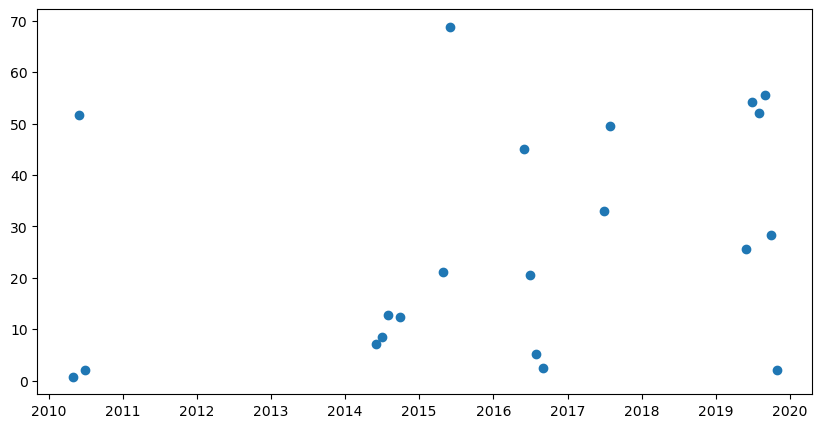

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_monthly.index, df_monthly.dms, 'o')

Text(0.5, 0, 'DMS daily mean [pptv]')

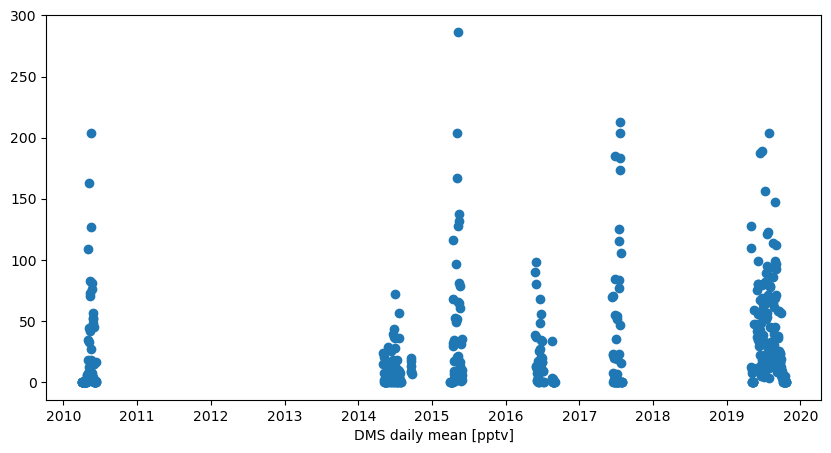

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_daily.index, df_daily.dms, 'o')
ax.set_xlabel('Datetime')
ax.set_xlabel('DMS daily mean [pptv]')
